## Analysis of All-Transactions House Price Index for California using STL and Prophet
datasource: https://fred.stlouisfed.org/series/CASTHPI

<Axes: title={'center': 'All-Transactions House Price Index for California'}, xlabel='time', ylabel='Index value'>

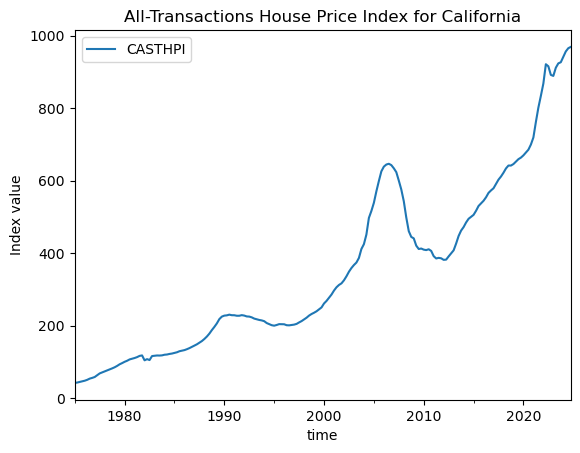

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CASTHPI.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

df.plot(
    xlabel='time', 
    ylabel='Index value', 
    title='All-Transactions House Price Index for California',
)

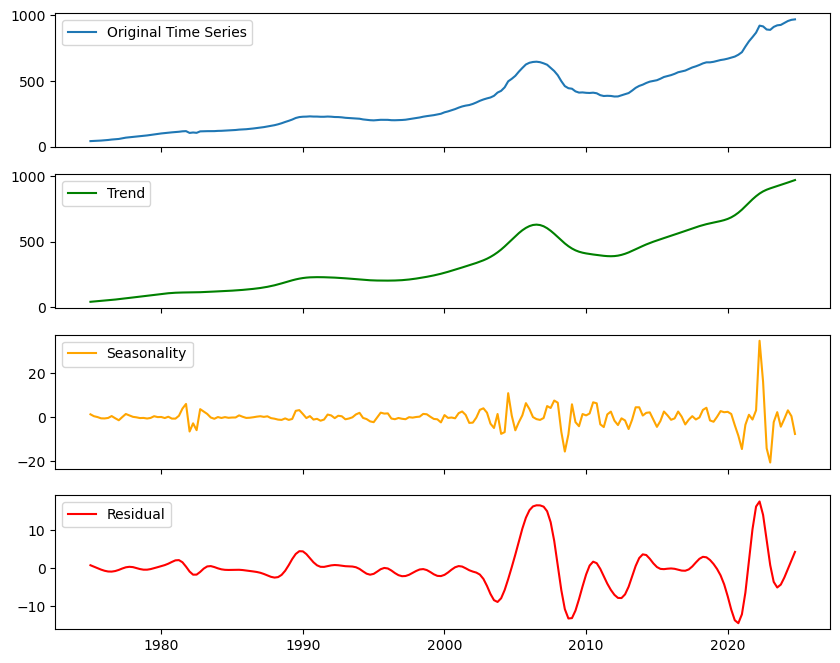

In [104]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['CASTHPI'], seasonal=3)
result = stl.fit()

trend = result.trend
seasonal = result.seasonal
residual = result.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(df, label="Original Time Series")
axes[0].legend()
axes[1].plot(trend, label="Trend", color="green")
axes[1].legend()
axes[2].plot(seasonal, label="Seasonality", color="orange")
axes[2].legend()
axes[3].plot(residual, label="Residual", color="red")
axes[3].legend()
plt.show()


In [ ]:
from prophet import Prophet

df.reset_index(inplace=True)
df.rename(columns={'observation_date': 'ds', 'CASTHPI': 'y'}, inplace=True)
model = Prophet()
model.fit(df)

16:08:51 - cmdstanpy - INFO - Chain [1] start processing
16:08:51 - cmdstanpy - INFO - Chain [1] done processing


In [106]:
future = model.make_future_dataframe(periods=40, freq='Q') # 10 years ahead (40 quarters)
forecast = model.predict(future)
forecast.tail()

c:\Users\krzys\miniconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
235,2033-09-30,1186.416020,1094.282751,1273.834477,1169.558682,1201.768889,-3.318213,-3.318213,-3.318213,-3.318213,-3.318213,-3.318213,0.0,0.0,0.0,1183.097807
236,2033-12-31,1194.744920,1101.080707,1286.566638,1177.042474,1210.630834,-4.075443,-4.075443,-4.075443,-4.075443,-4.075443,-4.075443,0.0,0.0,0.0,1190.669477
237,2034-03-31,1202.892757,1116.959347,1299.663511,1184.211006,1219.432654,9.408948,9.408948,9.408948,9.408948,9.408948,9.408948,0.0,0.0,0.0,1212.301705
238,2034-06-30,1211.131125,1126.665342,1311.183388,1191.472461,1228.597138,4.592234,4.592234,4.592234,4.592234,4.592234,4.592234,0.0,0.0,0.0,1215.723358
239,2034-09-30,1219.460025,1125.598031,1304.860993,1198.781668,1237.579075,-2.280085,-2.280085,-2.280085,-2.280085,-2.280085,-2.280085,0.0,0.0,0.0,1217.179940


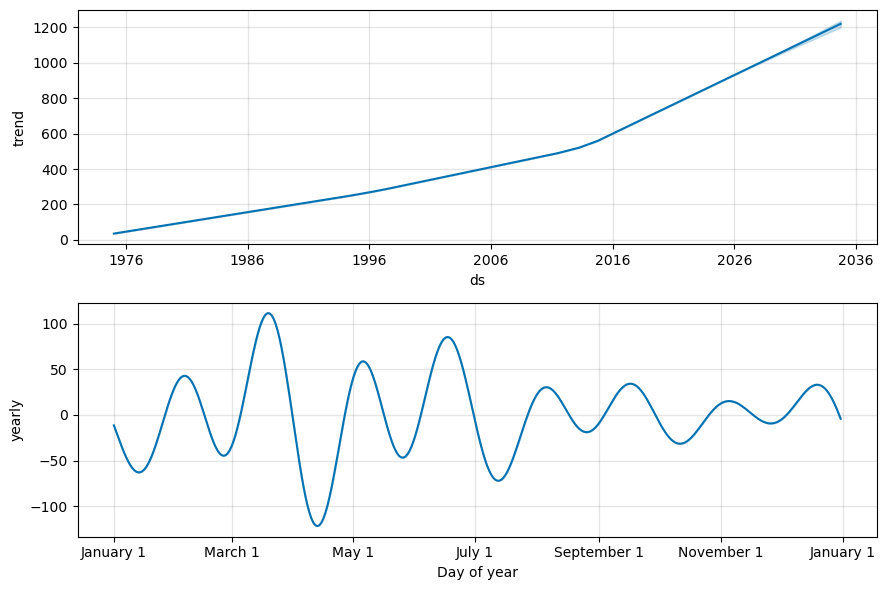

In [111]:
model.plot_components(forecast)
plt.show()
# trend and yearly seasonality